# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Load the dataset

In [2]:
# 데이터 다운로드
# !kaggle competitions download -c spaceship-titanic

In [3]:
# train
train = pd.read_csv("spaceship-titanic/train.csv")
print(train.shape)
train.head(2)

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True


In [4]:
# test
test = pd.read_csv("spaceship-titanic/test.csv")
print(test.shape)
test.head(2)

(4277, 13)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers


In [5]:
# 예측할 컬럼
set(train.columns) - set(test.columns)

{'Transported'}

# EDA

## info

- PassengerId, Transported를 제외하고 모두 결측치가 있는 것을 알 수 있다.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


## missing value

- 결측치의 비율은 약 2%로 비슷하다.

In [8]:
# train 컬럼별 결측치 개수 & 비율
mv_train = pd.concat([train.isnull().sum(), train.isnull().mean() * 100], axis=1)
mv_train.columns=["nan_sum", "nan_per(%)"]
mv_train

,nan_sum,nan_per(%)
PassengerId,0,0.000000
HomePlanet,201,2.312205
CryoSleep,217,2.496261
Cabin,199,2.289198
Destination,182,2.093639
Age,179,2.059128
VIP,203,2.335212
RoomService,181,2.082135
FoodCourt,183,2.105142
ShoppingMall,208,2.392730


In [9]:
# test 컬럼별 결측치 개수 & 비율
mv_test = pd.concat([test.isnull().sum(), test.isnull().mean() * 100], axis=1)
mv_test.columns=["nan_sum", "nan_per(%)"]
mv_test

,nan_sum,nan_per(%)
PassengerId,0,0.000000
HomePlanet,87,2.034136
CryoSleep,93,2.174421
Cabin,100,2.338087
Destination,92,2.151040
Age,91,2.127660
VIP,93,2.174421
RoomService,82,1.917232
FoodCourt,106,2.478373
ShoppingMall,98,2.291326


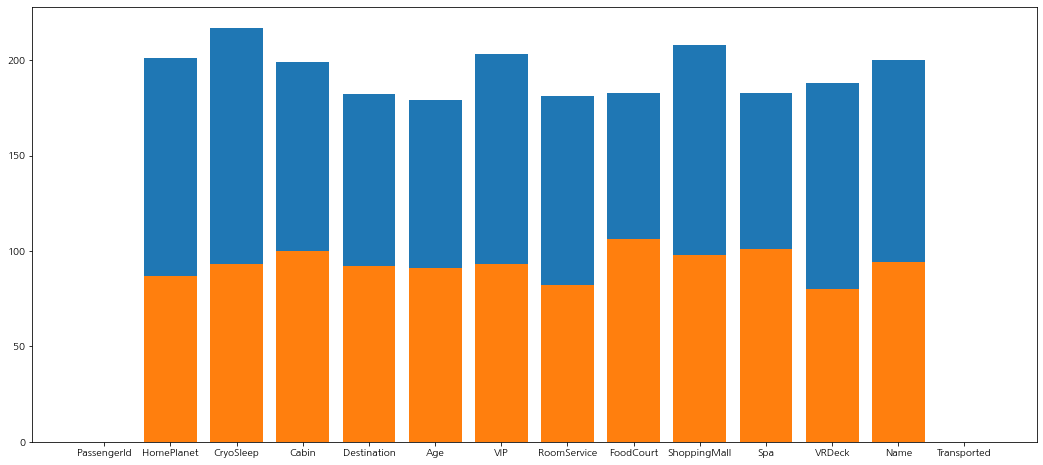

In [10]:
plt.figure(figsize=(18, 8))
plt.bar(x=mv_train.index, height=mv_train["nan_sum"])
plt.bar(x=mv_test.index, height=mv_test["nan_sum"]);

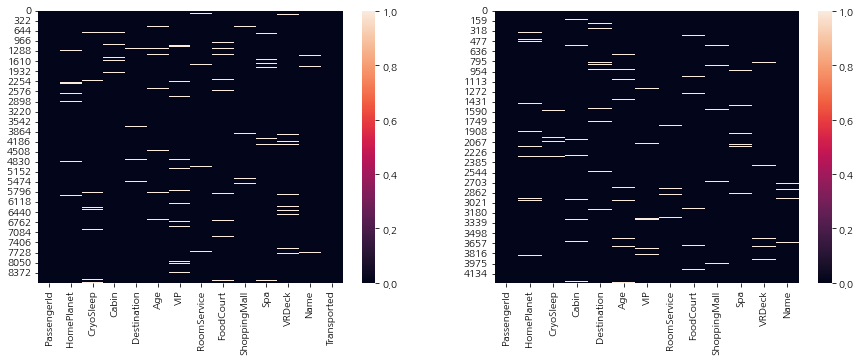

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
sns.heatmap(train.isnull(), ax=axes[0])
sns.heatmap(test.isnull(), ax=axes[1]);

## describe

In [12]:
# train 수치형 기술통계
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [13]:
# train 범주형 기술통계
train.describe(include="O")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [14]:
# test 수치형 기술통계
test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [15]:
# test 범주형 기술통계
test.describe(include="O")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,4277,4190,4184,4177,4185,4184,4183
unique,4277,3,2,3265,3,2,4176
top,0013_01,Earth,False,G/160/P,TRAPPIST-1e,False,Cints Erle
freq,1,2263,2640,8,2956,4110,2


## hist

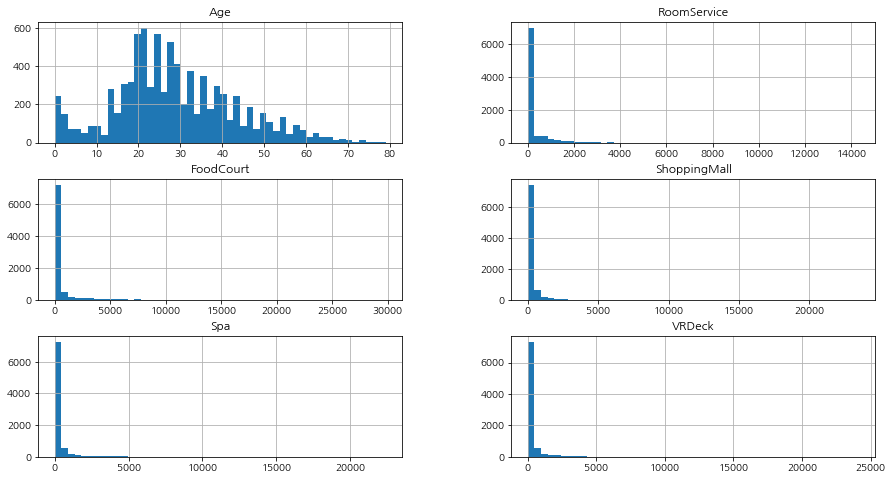

In [16]:
train.hist(figsize=(15, 8), bins=50);

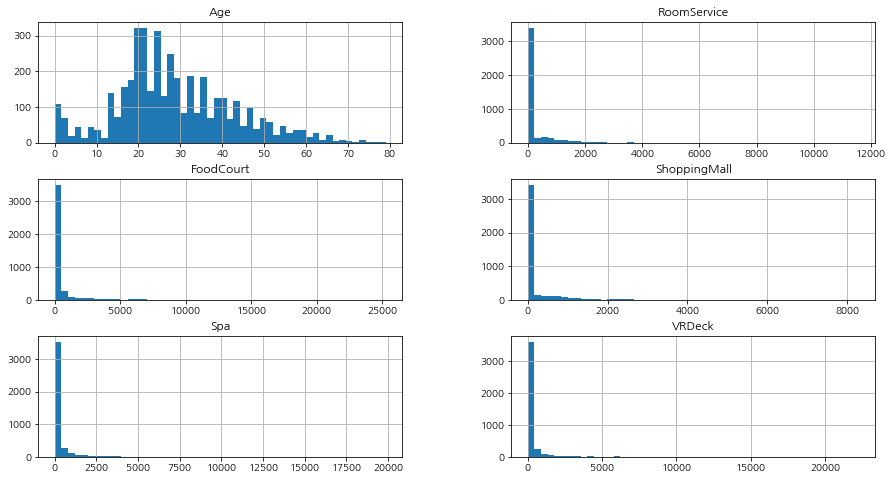

In [17]:
test.hist(figsize=(15, 8), bins=50);

# Data preprocessing

In [18]:
# 필요없는 컬럼 삭제 : PassengerId, Name
train = train.drop(columns=["PassengerId", "Name"])
test = test.drop(columns=["PassengerId", "Name"])

In [19]:
# Cabin : deck/num/side => deck 만 가져오기
train["Cabin"] = train["Cabin"].map(lambda x: str(x).split("/")[0])
test["Cabin"] = test["Cabin"].map(lambda x: str(x).split("/")[0])

In [20]:
# Cabin 결측치 변경
train["Cabin"] = train["Cabin"].replace("nan", np.nan)
test["Cabin"] = test["Cabin"].replace("nan", np.nan)

In [21]:
# RoomService + FoodCourt + ShoppingMall + Spa + VRDeck
train["luxury amenities"] = train.RoomService + train.FoodCourt + train.ShoppingMall + train.Spa + train.VRDeck
test["luxury amenities"] = test.RoomService + test.FoodCourt + test.ShoppingMall + test.Spa + test.VRDeck

# Feature Engineering

In [43]:
# get_dummies
cols = ["HomePlanet", "CryoSleep", "Cabin", "Destination", "VIP"]

train_ohe = pd.get_dummies(train[cols])
test_ohe = pd.get_dummies(test[cols])

In [67]:
train = pd.concat([train.drop(columns=cols), train_ohe], axis=1)
test = pd.concat([test.drop(columns=cols), test_ohe], axis=1)

In [68]:
# Imputing Missing Value
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

cols_1 = ["Age", "FoodCourt", "RoomService", "ShoppingMall", "Spa", "VRDeck", "luxury amenities"]

imputer.fit(train[cols_1])
train[cols_1] = imputer.transform(train[cols_1])
test[cols_1] = imputer.transform(test[cols_1])

In [69]:
# Age => 나이 소수점 표기 내림 처리
train.Age = np.floor(train.Age)
test.Age = np.floor(test.Age)

In [70]:
train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,luxury amenities,HomePlanet_Earth,HomePlanet_Europa,...,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_False,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0,1,...,0,0,0,0,0,0,0,1,1,0
1,24.0,109.0,9.0,25.0,549.0,44.0,True,736.0,1,0,...,0,0,1,0,0,0,0,1,1,0
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,10383.0,0,1,...,0,0,0,0,0,0,0,1,0,1
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,5176.0,0,1,...,0,0,0,0,0,0,0,1,1,0
4,16.0,303.0,70.0,151.0,565.0,2.0,True,1091.0,1,0,...,0,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,8536.0,0,1,...,0,0,0,0,0,1,0,0,0,1
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,0.0,1,0,...,0,0,0,1,0,0,1,0,1,0
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,1873.0,1,0,...,0,0,0,1,0,0,0,1,1,0
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,4637.0,0,1,...,0,1,0,0,0,1,0,0,1,0


# model

In [80]:
# 데이터셋 나누기
label_name = "Transported"
feature_name = train.columns.to_list()
feature_name.remove(label_name)

X_train = train[feature_name]
y_train = train[label_name]
X_test = test[feature_name]

In [112]:
input_shape = X_train.shape[1]
input_shape

25

In [76]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(units=128, input_shape=[input_shape]),
  tf.keras.layers.Dense(256, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [91]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",
             metrics=["binary_accuracy"])

In [92]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3328      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 36,609
Trainable params: 36,609
Non-trainable params: 0
_________________________________________________________________


In [93]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10)

history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=[early_stop])
history

Epoch 1/100
218/218 [==============================] - 1s 2ms/step - loss: 0.4511 - binary_accuracy: 0.7857 - val_loss: 0.4192 - val_binary_accuracy: 0.8120
Epoch 2/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4582 - binary_accuracy: 0.7790 - val_loss: 0.4284 - val_binary_accuracy: 0.8091
Epoch 3/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4596 - binary_accuracy: 0.7814 - val_loss: 0.4110 - val_binary_accuracy: 0.8074
Epoch 4/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4461 - binary_accuracy: 0.7866 - val_loss: 0.4557 - val_binary_accuracy: 0.8005
Epoch 5/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4501 - binary_accuracy: 0.7804 - val_loss: 0.4017 - val_binary_accuracy: 0.8079
Epoch 6/100
218/218 [==============================] - 0s 1ms/step - loss: 0.4471 - binary_accuracy: 0.7852 - val_loss: 0.4023 - val_binary_accuracy: 0.8074
Epoch 7/100
218/218 [==============================] - 0s 

In [94]:
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,binary_accuracy,val_loss,val_binary_accuracy
41,0.459962,0.780127,0.404490,0.806786
42,0.455927,0.774518,0.401735,0.805635
43,0.443540,0.781852,0.421871,0.809661
44,0.440975,0.786454,0.404951,0.811386
45,0.444596,0.780989,0.425325,0.800460


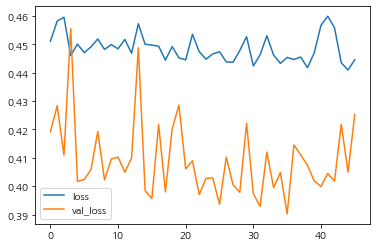

In [95]:
df_hist[["loss", "val_loss"]].plot();

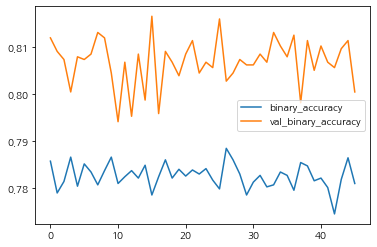

In [96]:
df_hist[["binary_accuracy", "val_binary_accuracy"]].plot();

In [97]:
y_pred = model.predict(X_test)
y_pred.shape

134/134 [==============================] - 0s 566us/step


(4277, 1)

In [108]:
labels = np.where(y_pred<0.5, 0, 1)
predict = labels.reshape(-1,)
predict = predict.astype(bool)
predict

array([ True, False,  True, ...,  True, False,  True])

# submission

In [90]:
sub = pd.read_csv("spaceship-titanic/sample_submission.csv")
sub.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [109]:
sub["Transported"] = predict
sub.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [110]:
sub.to_csv("spaceship-titanic/sub_1.csv", index=False)

In [111]:
pd.read_csv("spaceship-titanic/sub_1.csv")

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False
